# Predicting Onset/Diagnosis of Chronic Conditions, Diabetes

- toc: true 
- badges: true
- comments: true
- sticky_rank: 1
- categories: [Big Data , h2o]

# National Institute of Diabetes and Digestive and Kidney Diseases, https://www.niddk.nih.gov/


![h2o.ai](https://avatars0.githubusercontent.com/u/1402695?s=200&v=4)


Credit: code from https://www.kaggle.com/sudalairajkumar/getting-started-with-h2o

In [3]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/gao/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_bd4si0c
  JVM stdout: /tmp/tmp_bd4si0c/h2o_gao_started_from_python.out
  JVM stderr: /tmp/tmp_bd4si0c/h2o_gao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_gao_qldgcm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.854 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
diabetes_df = h2o.import_file("https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/diabetes.csv", destination_frame="diabetes_df")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/diabetes.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

/tmp/ipykernel_194458/4254946008.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
diabetes_df.describe()

Rows:768
Cols:9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


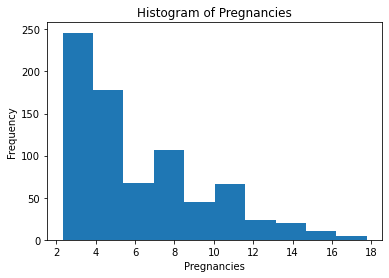

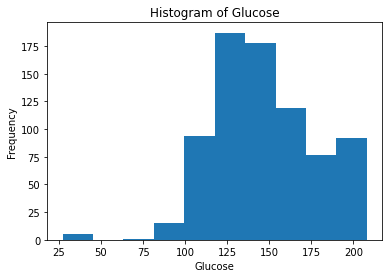

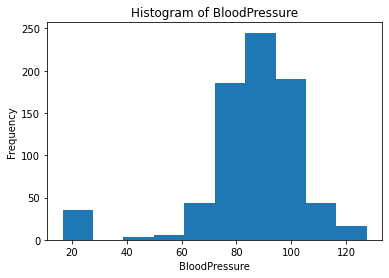

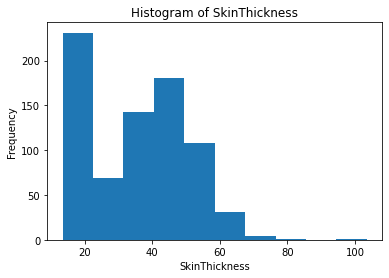

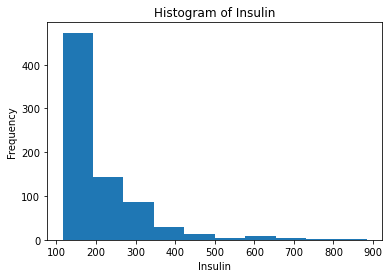

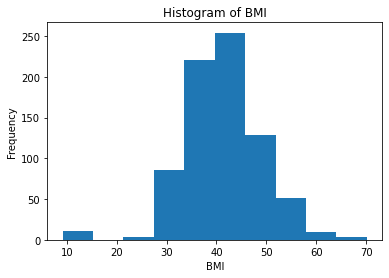

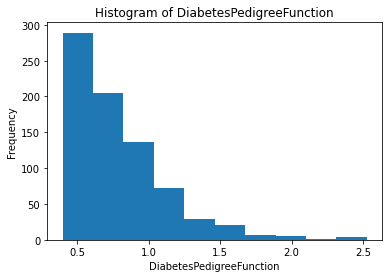

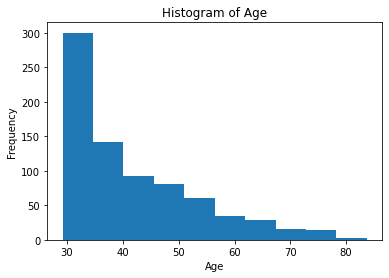

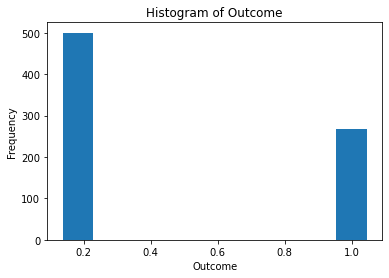

In [8]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

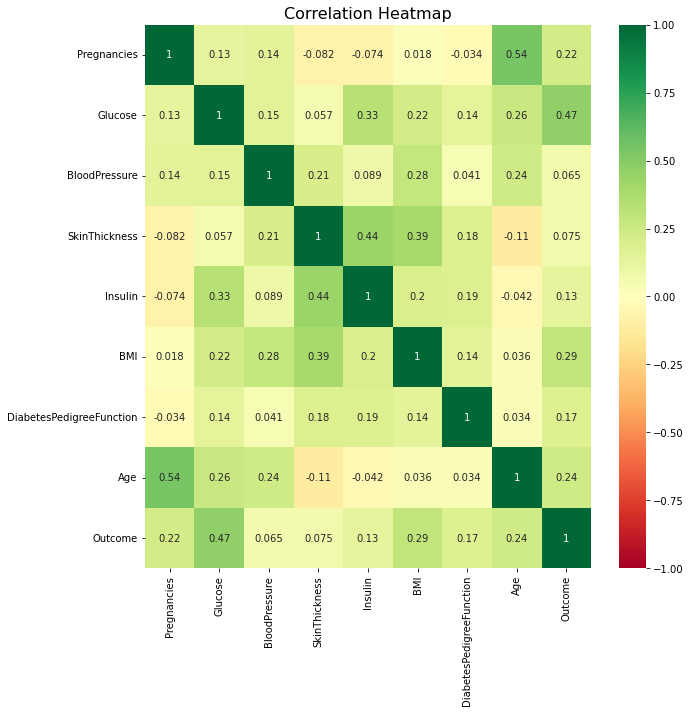

In [9]:
plt.figure(figsize=(10,10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [10]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [11]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1664728158045_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          11549                  5            5            5             6             23            13.68

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05721884192287545
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      290  9    0.0301   (9.0/299.0)
1      14   152  0.0843   (14.0/166.0)
Total  304  161  0.0495   (23.0/465.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.462205     0.929664  150
max f2                       0.323826     0.944836  176
max f0point5                 0.548022     0.967302  132
max accuracy                 0.506976     0.950538  142
max precision                0.98385      1         0
max recall                   0.173383     1         227
max specificity              0.98385      1         0
max absolute_mcc             0.506976     0.892066  142
max min_per_class_accuracy   0.372134     0.939799  163
max mean_per_class_accuracy  0.370458     0.945803  164
max tns                      0.98385      299       0
max fns                      0.98385      165       0
max fps                      0.0187128    299       399
max tps                      0.173383     166       227
max tnr                      0.98385      1         0
max fnr                      0.98385      0.993976  0
max fpr                      0.0187128    1         399
max tpr                      0.173383     1         227

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107527                   0.96476            2.8012     2.8012             1                0.970134   1                           0.970134            0.0301205       0.0301205                  180.12    180.12             0.0301205
2        0.0215054                   0.959842           2.8012     2.8012             1                0.963441   1                           0.966788            0.0301205       0.060241                   180.12    180.12             0.060241
3        0.0301075                   0.948198           2.8012     2.8012             1                0.952824   1                           0.962798            0.0240964       0.0843373                  180.12    180.12             0.0843373
4        0.0408602                   0.944016           2.8012     2.8012             1                0.946246   1                           0.958442            0.0301205       0.114458                   180.12    180.12             0.114458
5        0.0516129                   0.940243           2.8012     2.8012             1                0.942268   1                           0.955073        

In [12]:
print(gbm)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1664728158045_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          11549                  5            5            5             6             23            13.68

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05721884192287545
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      290 

In [13]:
perf = gbm.model_performance(valid)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6470306042290592
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      53   44   0.4536   (44.0/97.0)
1      3    48   0.0588   (3.0/51.0)
Total  56   92   0.3176   (47.0/148.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.145839     0.671329  91
max f2                       0.112531     0.819936  106
max f0point5                 0.668426     0.642458  31
max accuracy                 0.668426     0.75      31
max precision                0.980739     1         0
max recall                   0.112531  

In [14]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |

/home/gao/anaconda3/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1664728158045_54


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          13030                  5            5            5             13            22            17.8913

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.16518968941442272
RMSE: 0.40643534469140685
LogLoss: 0.5115661709706083
Mean Per-Class Error: 0.1314522303259862
AUC: 0.9354776967401377
AUCPR: 0.8897929742456694
Gini: 0.8709553934802754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33018826601891127
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      233  66   0.2207   (66.0/299.0)
1      7    159  0.0422   (7.0/166.0)
Total  240  225  0.157    (73.0/465.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.330188     0.813299  207
max f2                       0.330188     0.894263  207
max f0point5                 0.420919     0.826211  126
max accuracy                 0.40177      0.855914  137
max precision                0.581368     1         0
max recall                   0.275007     1         287
max specificity              0.581368     1         0
max absolute_mcc             0.330188     0.70667   207
max min_per_class_accuracy   0.36693      0.846154  172
max mean_per_class_accuracy  0.330188     0.868548  207
max tns                      0.581368     299       0
max fns                      0.581368     165       0
max fps                      0.226037     299       399
max tps                      0.275007     166       287
max tnr                      0.581368     1         0
max fnr                      0.581368     0.993976  0
max fpr                      0.226037     1         399
max tpr                      0.275007     1         287

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.61 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107527                   0.56897            2.8012    2.8012             1                0.572539  1                           0.572539            0.0301205       0.0301205                  180.12    180.12             0.0301205
2        0.0215054                   0.565482           2.8012    2.8012             1                0.567511  1                           0.570025            0.0301205       0.060241                   180.12    180.12             0.060241
3        0.0301075                   0.560381           2.8012    2.8012             1                0.563216  1                           0.56808             0.0240964       0.0843373                  180.12    180.12             0.0843373
4        0.0408602                   0.555895           2.8012    2.8012             1                0.557806  1                           0.565376            0.0301205       0.114458                   180.12    180.12             0.114458
5        0.0516129                   0.550417           2.8012    2.8012             1                0.5534    1                           0.562881            0.030120

In [15]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [16]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,model_ids,logloss
,10.0,depth_grid_model_4,0.5610333
,12.0,depth_grid_model_5,0.5610432
,8.0,depth_grid_model_3,0.5618676
,6.0,depth_grid_model_2,0.5688369
,4.0,depth_grid_model_1,0.5720338


In [17]:
print(grid)

Hyper-Parameter Search Summary: ordered by increasing logloss
    max_depth    model_ids           logloss
--  -----------  ------------------  ---------
    10           depth_grid_model_4  0.561033
    12           depth_grid_model_5  0.561043
    8            depth_grid_model_3  0.561868
    6            depth_grid_model_2  0.568837
    4            depth_grid_model_1  0.572034


In [18]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
    max_depth    model_ids           auc
--  -----------  ------------------  --------
    10           depth_grid_model_4  0.806752
    12           depth_grid_model_5  0.806752
    8            depth_grid_model_3  0.803315
    6            depth_grid_model_2  0.803113
    4            depth_grid_model_1  0.798464


In [19]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.806061,0.028867,0.815126,0.841667,0.775000,0.792453
1,auc,0.834600,0.025335,0.871185,0.824937,0.813037,0.829241
2,err,0.193939,0.028867,0.184874,0.158333,0.225000,0.207547
3,err_count,22.500000,3.316625,22.000000,19.000000,27.000000,22.000000
4,f0point5,0.716627,0.023856,0.743243,0.699301,0.693878,0.730089
5,f1,0.735939,0.051860,0.800000,0.677966,0.715789,0.750000
6,f2,0.758549,0.086101,0.866142,0.657895,0.739130,0.771028
7,lift_top_group,2.091386,0.650080,1.239583,1.935484,2.666667,2.523809
8,logloss,0.484218,0.030851,0.460773,0.456354,0.520194,0.499551
9,max_per_class_error,0.266773,0.061059,0.253521,0.354839,0.244444,0.214286


In [20]:
cv_gbm.model_performance(valid).auc()

0.8103901354356176

**XGBoost:**

In [21]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |

/home/gao/anaconda3/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%


0.7982615726703053

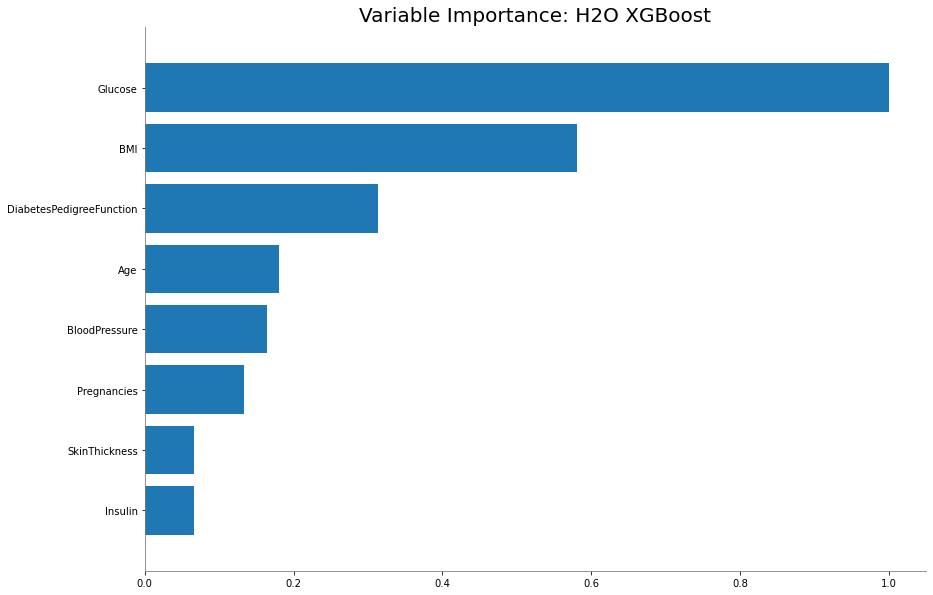

<Figure size 432x288 with 0 Axes>

In [22]:
cv_xgb.varimp_plot()

**AutoML : Automatic Machine Learning:**

From the [H2O AutoML page](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html),

In [23]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
09:29:47.222: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221002_92947


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 42                          45661                  10           17           13.4524       65            100           81.6667

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16440960271068342
RMSE: 0.4054745401510228
LogLoss: 0.8344361335366673
Mean Per-Class Error: 0.23919087722125965
AUC: 0.8153785711407503
AUCPR: 0.700970825419835
Gini: 0.6307571422815006

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      210  89   0.2977   (89.0/299.0)
1      30   136  0.1807   (30.0/166.0)
Total  240  225  0.2559   (119.0/465.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.35         0.695652  85
max f2                       0.266667     0.786638  101
max f0point5                 0.48227      0.681818  56
max accuracy                 0.48227      0.772043  56
max precision                1            1         0
max recall                   0            1         150
max specificity              1            1         0
max absolute_mcc             0.48227      0.500879  56
max min_per_class_accuracy   0.411765     0.746988  72
max mean_per_class_accuracy  0.35         0.760809  85
max tns                      1            299       0
max fns                      1            164       0
max fps                      0            299       150
max tps                      0            166       150
max tnr                      1            1         0
max fnr                      1            0.987952  0
max fpr                      0            1         150
max tpr                      0            1         150

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 36.54 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107527                   0.938824           2.24096   2.24096            0.8              0.966471   0.8                         0.966471            0.0240964       0.0240964                  124.096   124.096            0.0207519
2        0.0215054                   0.895059           2.8012    2.52108            1                0.928333   0.9                         0.947402            0.0301205       0.0542169                  180.12    152.108            0.0508724
3        0.0322581                   0.875              1.68072   2.24096            0.6              0.877941   0.8                         0.924248            0.0180723       0.0722892                  68.0723   124.096            0.0622557
4        0.0430108                   0.857143           2.24096   2.24096            0.8              0.857143   0.8                         0.907472            0.0240964       0.0963855                  124.096   124.096            0.0830076
5        0.0537634                   0.842105           2.8012    2.35301            1                0.846073   0.84                        0.895192            0.0301205       0.126506  

automl leaderboard:

In [24]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20221002_92947,0.840694,0.669853,0.753861,0.230155,0.389285,0.151543
StackedEnsemble_BestOfFamily_1_AutoML_1_20221002_92947,0.832736,0.479362,0.721094,0.234889,0.392271,0.153877
GBM_4_AutoML_1_20221002_92947,0.832121,0.473359,0.7492,0.235877,0.390696,0.152643
GLM_1_AutoML_1_20221002_92947,0.831638,0.488798,0.716653,0.238204,0.395915,0.156749
GBM_2_AutoML_1_20221002_92947,0.829985,0.480355,0.727995,0.238234,0.394038,0.155266
StackedEnsemble_AllModels_1_AutoML_1_20221002_92947,0.826027,0.486947,0.71757,0.249879,0.397346,0.157884
XRT_1_AutoML_1_20221002_92947,0.825976,0.555213,0.72196,0.232532,0.399288,0.159431
GBM_3_AutoML_1_20221002_92947,0.821655,0.490684,0.719058,0.251904,0.398949,0.15916
XGBoost_1_AutoML_1_20221002_92947,0.820687,0.492297,0.703893,0.248559,0.402223,0.161783
XGBoost_2_AutoML_1_20221002_92947,0.820264,0.501107,0.697644,0.239886,0.405695,0.164588


In [28]:
#metalearner = h2o.get_model(aml.leader.metalearner()['name'])
#metalearner.std_coef_plot()